### Student Grade Predictions

#### Source

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

#### Dataset

The data set provides information about student achievement in two portuguese secondary school. 

The target variable are the final scores in mathematics ranging from 0 to 20.

The objective of this project is to build a model to predict the final scores of the students

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',500)

##### Importing Dataset

In [2]:
df = pd.read_csv("D:\Desktop\student\student-mat.csv",sep=";") # Math Dataset

### Data Preparation/Exploratory Analysis/Visualization

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
df.shape

(395, 33)

From the above, it can be seen that the dataset has 32 input variables and 1 output variable.

The input variables are a mixture of numeric and categorical whereas the output variable is numeric

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

From the above, we can deduce the following:

(1) There are 32 input variables and 1 target variable

(2) No missing data

(3) 16 Numerical variables and 17 categorical

#### Data Visualization

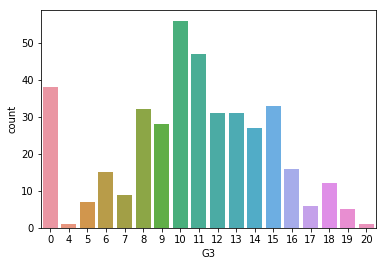

In [7]:
sns.countplot(x="G3",data=df)
plt.savefig('G3_count_plot.png', dpi=300)

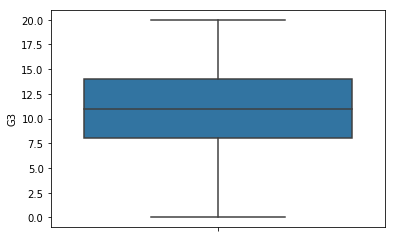

In [8]:
sns.boxplot(y= "G3",data = df)
plt.savefig('G3_boxplot.png', dpi=300)

From the above, we can see that the target variable follows a normal distribution except for a large number of people scoring 0

In [9]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

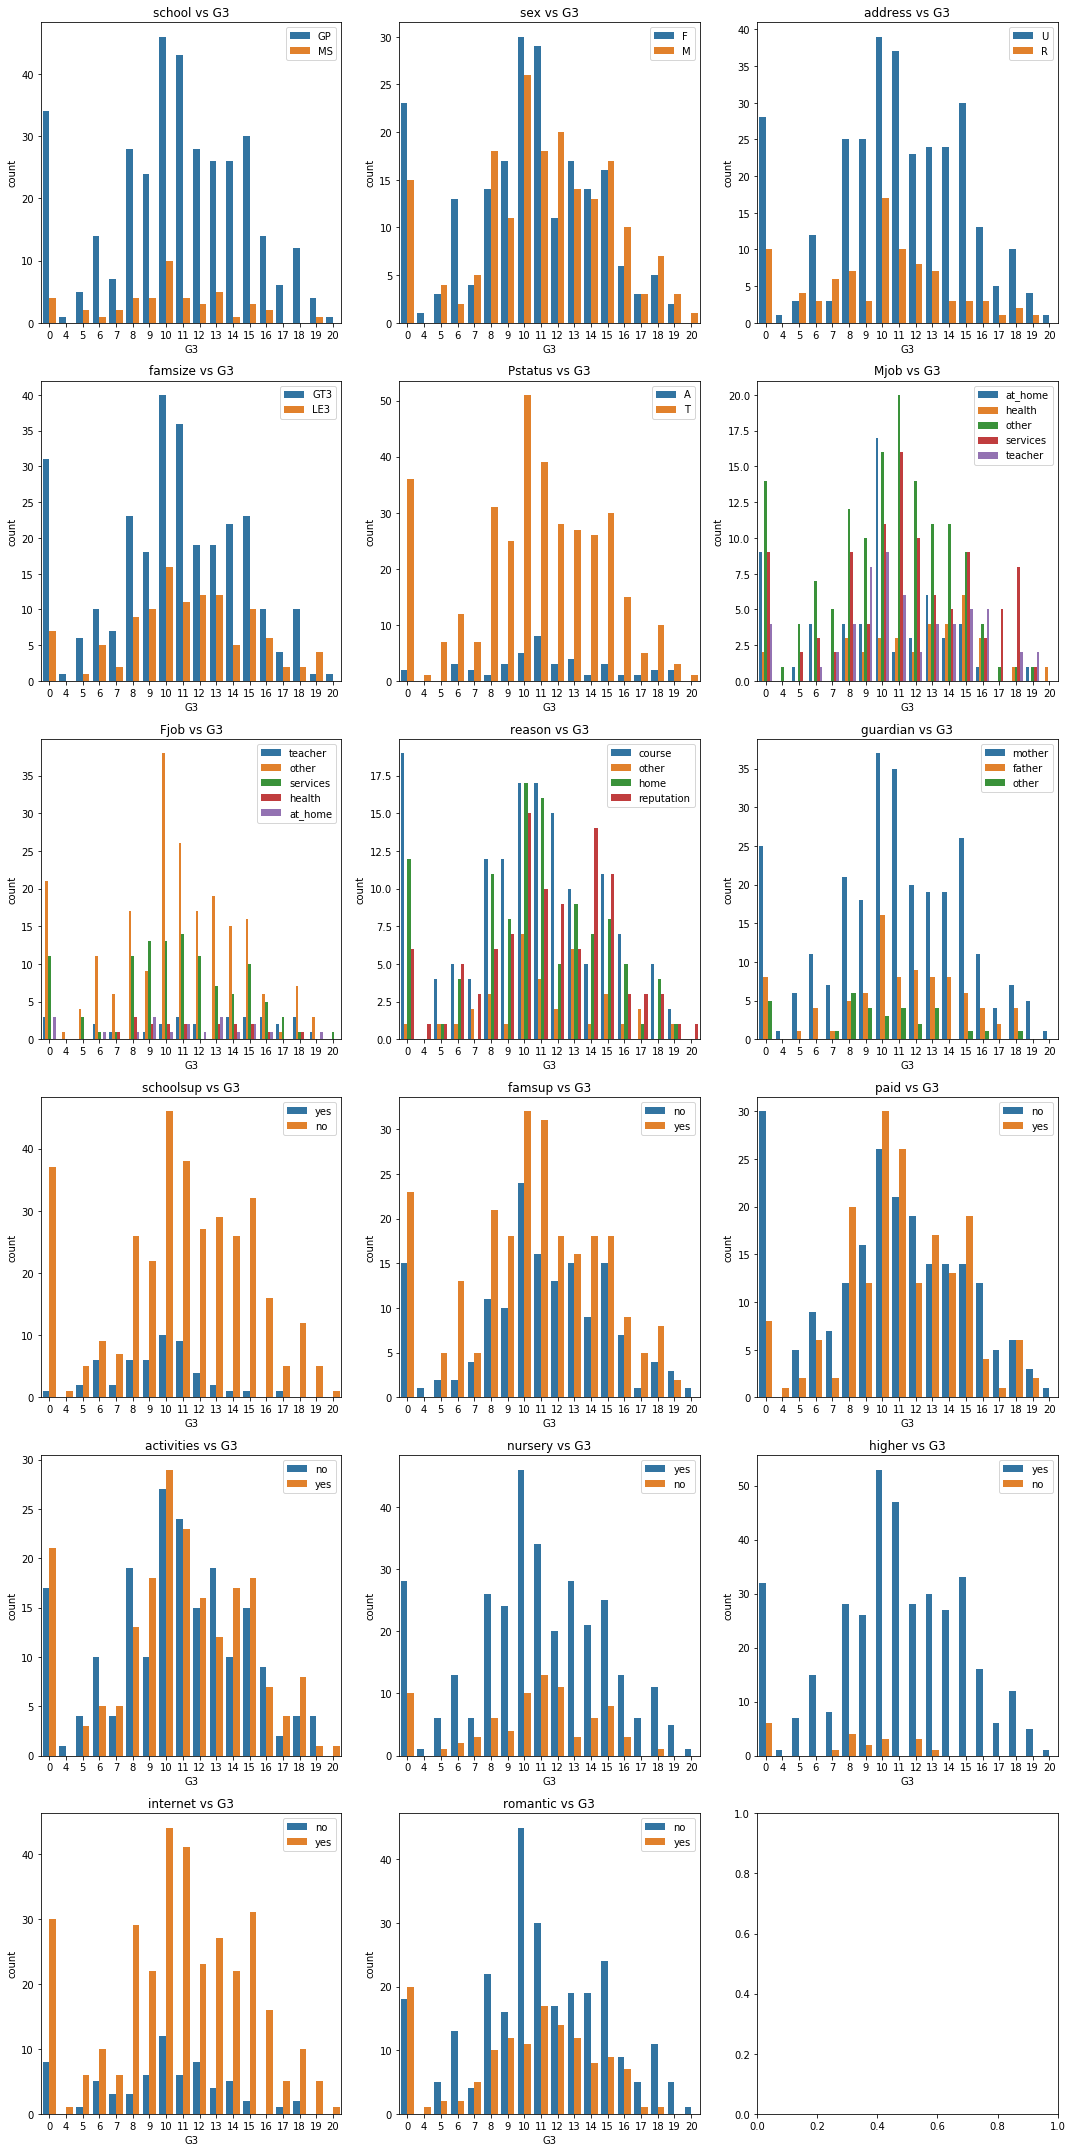

In [10]:
# Categorical Variables vs Target Variable
f, axes = plt.subplots(6,3 ,figsize=(15,30))
cnt = 0
cat = ['school', 'sex','address', 'famsize', 'Pstatus','Mjob', 'Fjob', 'reason', 'guardian','schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']
for ax_ in axes.flatten(): 
    if cnt < 17:
        sns.countplot(x = "G3", hue = cat[cnt] , data=df, ax=ax_)
        ax_.set_title("{} vs G3".format(cat[cnt]))
        ax_.legend(loc=1)
        f.subplots_adjust(hspace=0.5)
        cnt = cnt + 1
    else:
        cnt = 0

f.tight_layout()
plt.savefig('distribution1.png', dpi=300)

In [11]:
# Categorical Variables vs Target Variable
#f, axes = plt.subplots(8,2 ,figsize=(15,30))
#cnt = 0
#num = ['age','Medu', 'Fedu','traveltime', 'studytime','failures','famrel', 'freetime', 'goout', 'Dalc',
#       'Walc', 'health', 'absences', 'G1', 'G2']
#for ax_ in axes.flatten(): 
#    if cnt < 15:
#        sns.distplot(df[num[cnt]], ax=ax_)
#        #ax_.set_title("{} vs G3".format(cat[cnt]))
#        #ax_.legend(loc=1)
#        #f.subplots_adjust(hspace=0.5)
#        cnt = cnt + 1
#    else:
#        cnt = 0

#f.tight_layout()

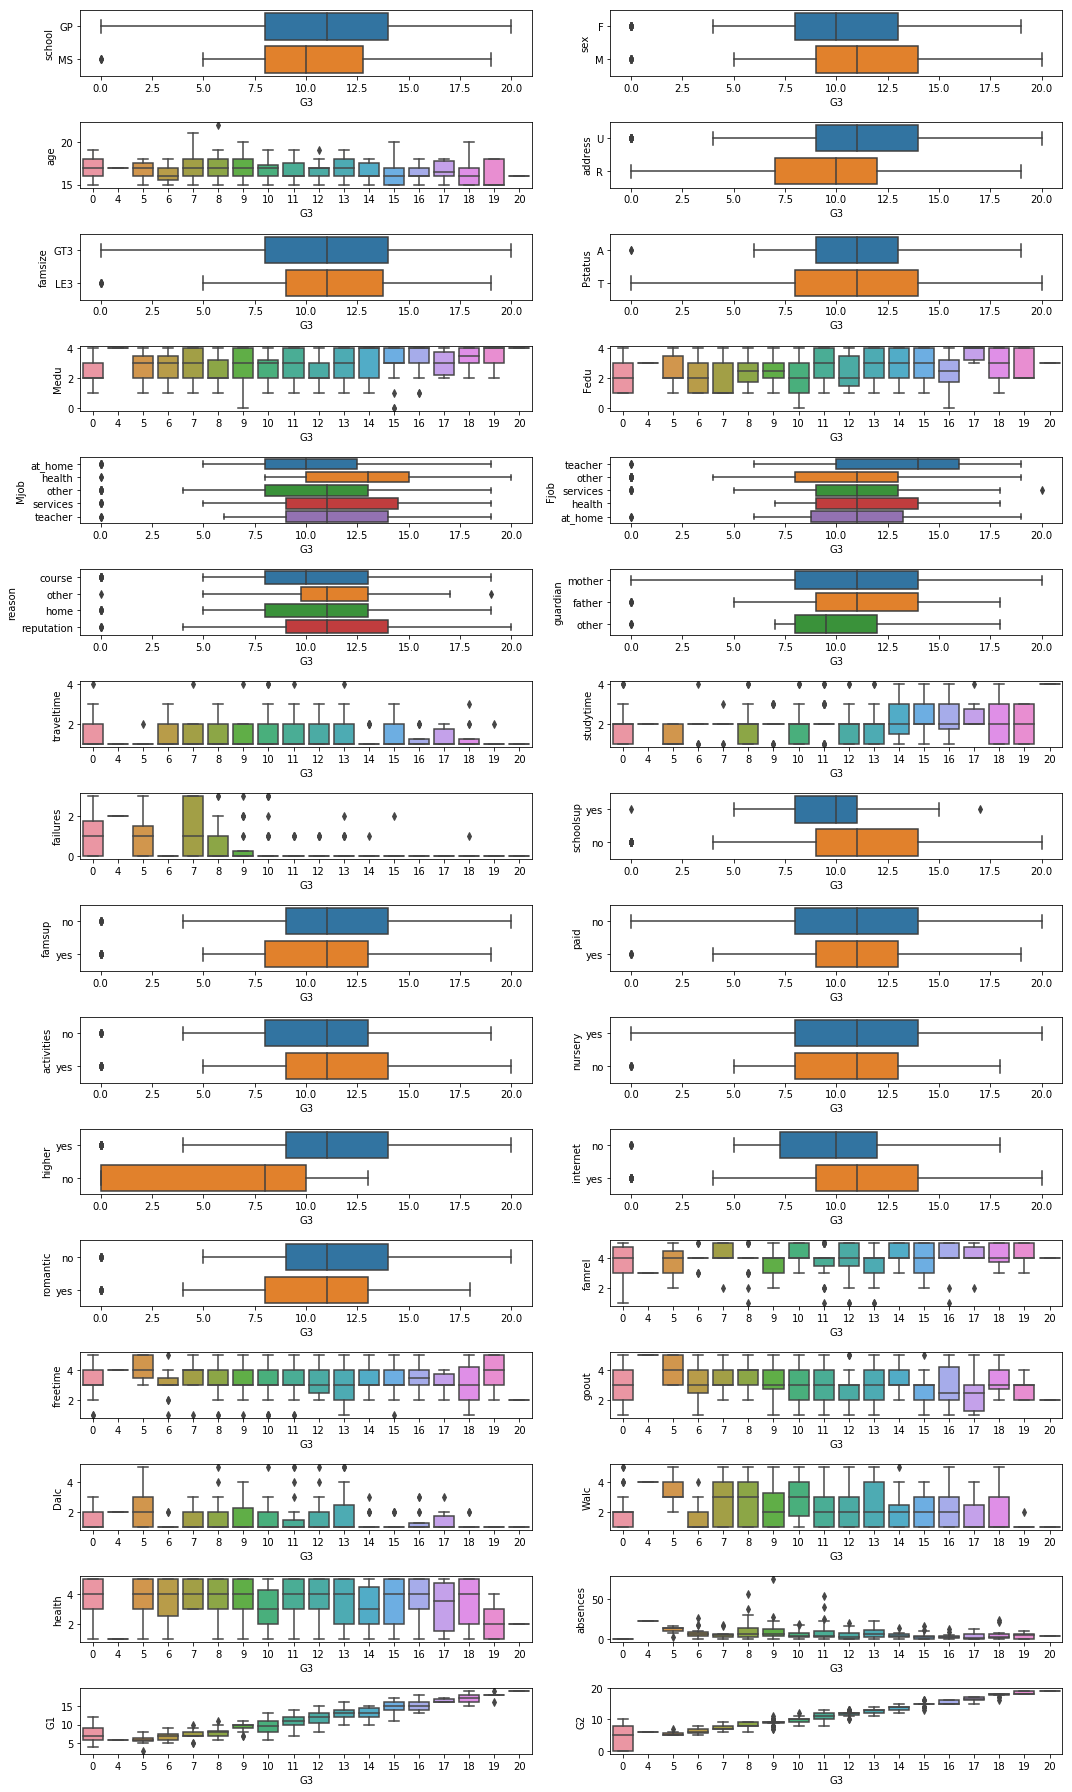

In [12]:
# Set figsize here
f, axes = plt.subplots(16,2 ,figsize=(15,25))
cnt = 0
for ax_ in axes.flatten(): 
    if cnt > 32:
        cnt = 32
    sns.boxplot(y= df.columns[cnt] , x= "G3" , data=df, ax=ax_)
    cnt = cnt + 1

f.tight_layout()

From the above graphs, the following can be concluded:
    
    (1) GP school has better scores than MS school
    (2) Male students did better than female
    (3) Students living in urban areas had higher averages
    (4) Students that intend on pursuing higher education have better scores

##### Create a test Set

In [13]:
#from sklearn.model_selection import train_test_split

In [14]:
#train, test = train_test_split(df,test_size = 0.2, random_state = 42)

In [15]:
#train = train.reset_index()
#test = test.reset_index()

#### Find correlation between numerical variables and target variable

In [16]:
corr_matrix = df.corr()
corr_matrix["G3"].sort_values(ascending = False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

Variables G2 and G1 seems to have a very strong correlation with the target variable.

It will have to be dropped

#### Standardization

In [17]:
num = corr_matrix["G3"].sort_values(ascending = False).index.values

In [18]:
num

array(['G3', 'G2', 'G1', 'Medu', 'Fedu', 'studytime', 'famrel',
       'absences', 'freetime', 'Walc', 'Dalc', 'health', 'traveltime',
       'goout', 'age', 'failures'], dtype=object)

In [19]:
from sklearn import preprocessing

ss = preprocessing.MinMaxScaler()
df_scaled = ss.fit_transform(df[num])
df_scaled = pd.DataFrame(df_scaled,columns=num)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [20]:
df_scaled.head()

,G3,G2,G1,Medu,Fedu,studytime,famrel,absences,freetime,Walc,Dalc,health,traveltime,goout,age,failures
0,0.30,0.315789,0.1250,1.00,1.00,0.333333,0.75,0.080000,0.50,0.00,0.00,0.5,0.333333,0.75,0.428571,0.0
1,0.30,0.263158,0.1250,0.25,0.25,0.333333,1.00,0.053333,0.50,0.00,0.00,0.5,0.000000,0.50,0.285714,0.0
2,0.50,0.421053,0.2500,0.25,0.25,0.333333,0.75,0.133333,0.50,0.50,0.25,0.5,0.000000,0.25,0.000000,1.0
3,0.75,0.736842,0.7500,1.00,0.50,0.666667,0.50,0.026667,0.25,0.00,0.00,1.0,0.000000,0.25,0.000000,0.0
4,0.50,0.526316,0.1875,0.75,0.75,0.333333,0.75,0.053333,0.50,0.25,0.00,1.0,0.000000,0.25,0.142857,0.0


In [21]:
stnd_df = df.copy()

In [22]:
for j in num:
    stnd_df[j] = df_scaled[j]

In [23]:
stnd_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,0.428571,U,GT3,A,1.00,1.00,at_home,teacher,course,mother,0.333333,0.333333,0.0,yes,no,no,no,yes,yes,no,no,0.75,0.50,0.75,0.00,0.00,0.5,0.080000,0.1250,0.315789,0.30
1,GP,F,0.285714,U,GT3,T,0.25,0.25,at_home,other,course,father,0.000000,0.333333,0.0,no,yes,no,no,no,yes,yes,no,1.00,0.50,0.50,0.00,0.00,0.5,0.053333,0.1250,0.263158,0.30
2,GP,F,0.000000,U,LE3,T,0.25,0.25,at_home,other,other,mother,0.000000,0.333333,1.0,yes,no,yes,no,yes,yes,yes,no,0.75,0.50,0.25,0.25,0.50,0.5,0.133333,0.2500,0.421053,0.50
3,GP,F,0.000000,U,GT3,T,1.00,0.50,health,services,home,mother,0.000000,0.666667,0.0,no,yes,yes,yes,yes,yes,yes,yes,0.50,0.25,0.25,0.00,0.00,1.0,0.026667,0.7500,0.736842,0.75
4,GP,F,0.142857,U,GT3,T,0.75,0.75,other,other,home,father,0.000000,0.333333,0.0,no,yes,yes,no,yes,yes,no,no,0.75,0.50,0.25,0.00,0.25,1.0,0.053333,0.1875,0.526316,0.50


However, from the above, it can be seen that the categorical variables were not included, lets implement encoding

#### Encoding Yes/No as 1 and 0

In [24]:
ord = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic']
enc_df = stnd_df.copy()

In [25]:
for i in ord:
    enc_df[i] = enc_df[i].map({'yes': 1, 'no': 0})

In [26]:
enc_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,0.428571,U,GT3,A,1.00,1.00,at_home,teacher,course,mother,0.333333,0.333333,0.0,1,0,0,0,1,1,0,0,0.75,0.50,0.75,0.00,0.00,0.5,0.080000,0.1250,0.315789,0.30
1,GP,F,0.285714,U,GT3,T,0.25,0.25,at_home,other,course,father,0.000000,0.333333,0.0,0,1,0,0,0,1,1,0,1.00,0.50,0.50,0.00,0.00,0.5,0.053333,0.1250,0.263158,0.30
2,GP,F,0.000000,U,LE3,T,0.25,0.25,at_home,other,other,mother,0.000000,0.333333,1.0,1,0,1,0,1,1,1,0,0.75,0.50,0.25,0.25,0.50,0.5,0.133333,0.2500,0.421053,0.50
3,GP,F,0.000000,U,GT3,T,1.00,0.50,health,services,home,mother,0.000000,0.666667,0.0,0,1,1,1,1,1,1,1,0.50,0.25,0.25,0.00,0.00,1.0,0.026667,0.7500,0.736842,0.75
4,GP,F,0.142857,U,GT3,T,0.75,0.75,other,other,home,father,0.000000,0.333333,0.0,0,1,1,0,1,1,0,0,0.75,0.50,0.25,0.00,0.25,1.0,0.053333,0.1875,0.526316,0.50


#### One Hot Encoding

In [27]:
enc_df = pd.get_dummies(enc_df, columns = ['school', 'sex', 'address', 'famsize', 'Pstatus','Mjob', 'Fjob', 'reason', 'guardian'], drop_first = True)

In [28]:
enc_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0.428571,1.00,1.00,0.333333,0.333333,0.0,1,0,0,0,1,1,0,0,0.75,0.50,0.75,0.00,0.00,0.5,0.080000,0.1250,0.315789,0.30,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.285714,0.25,0.25,0.000000,0.333333,0.0,0,1,0,0,0,1,1,0,1.00,0.50,0.50,0.00,0.00,0.5,0.053333,0.1250,0.263158,0.30,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.000000,0.25,0.25,0.000000,0.333333,1.0,1,0,1,0,1,1,1,0,0.75,0.50,0.25,0.25,0.50,0.5,0.133333,0.2500,0.421053,0.50,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0
3,0.000000,1.00,0.50,0.000000,0.666667,0.0,0,1,1,1,1,1,1,1,0.50,0.25,0.25,0.00,0.00,1.0,0.026667,0.7500,0.736842,0.75,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0
4,0.142857,0.75,0.75,0.000000,0.333333,0.0,0,1,1,0,1,1,0,0,0.75,0.50,0.25,0.00,0.25,1.0,0.053333,0.1875,0.526316,0.50,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0


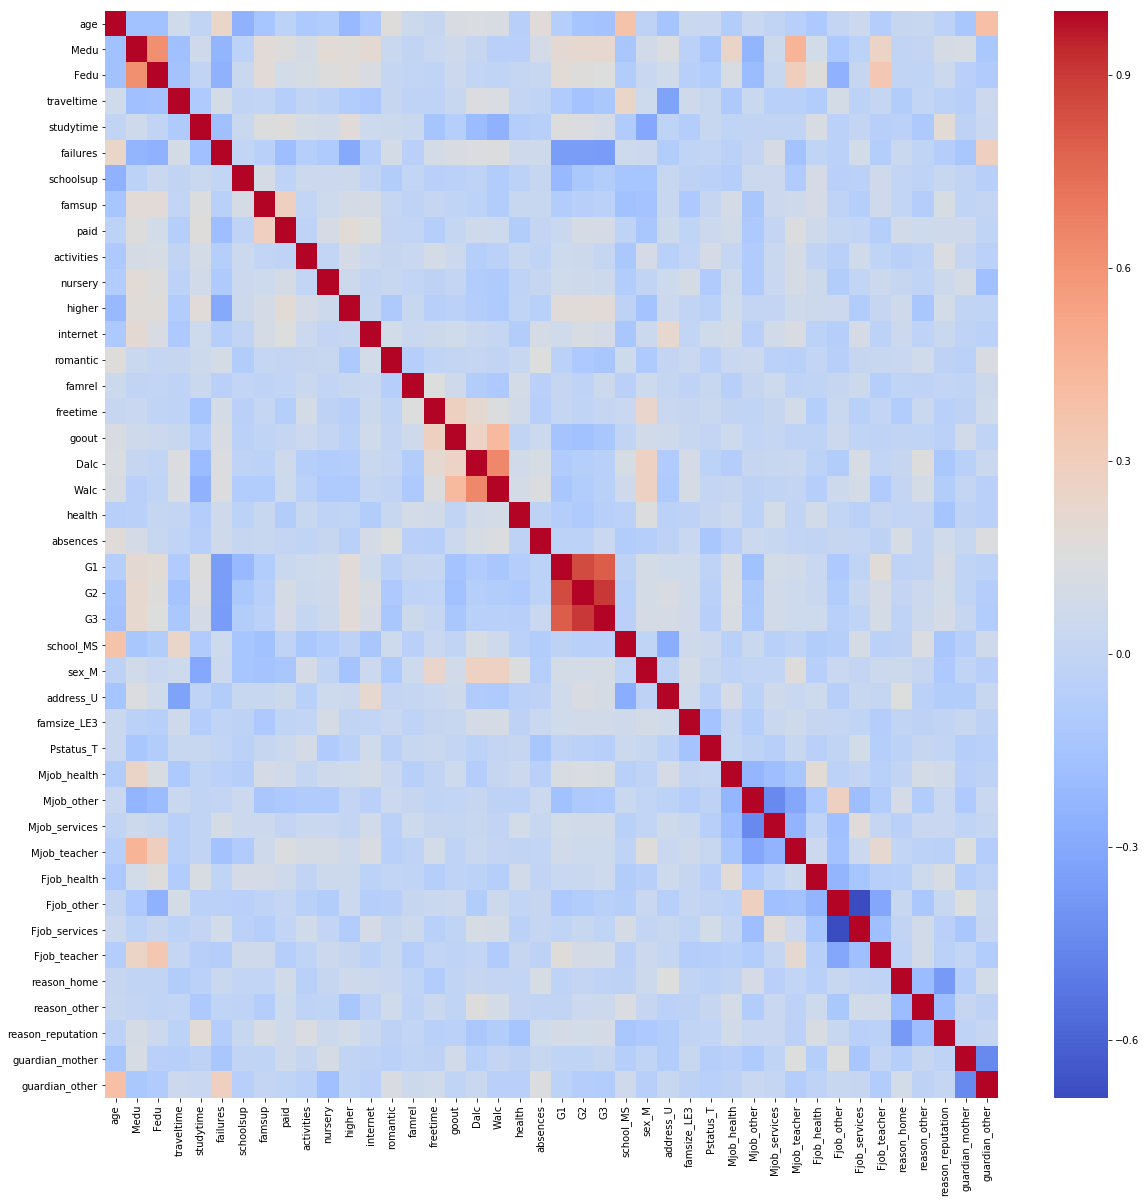

In [29]:
plt.figure(figsize=(20, 20))
sns.heatmap(enc_df.corr(),cmap='coolwarm')
plt.savefig('corr_matrix.png', dpi=300)

In [30]:
corr_matrix = enc_df.corr()
abs(corr_matrix["G3"]).sort_values(ascending = False)

G3                   1.000000
G2                   0.904868
G1                   0.801468
failures             0.360415
Medu                 0.217147
higher               0.182465
age                  0.161579
Fedu                 0.152457
goout                0.132791
romantic             0.129970
traveltime           0.117142
Mjob_health          0.116158
address_U            0.105756
sex_M                0.103456
paid                 0.101996
internet             0.098483
studytime            0.097820
Mjob_other           0.096477
reason_reputation    0.095692
Fjob_teacher         0.095374
guardian_other       0.087774
schoolsup            0.082788
famsize_LE3          0.081407
Mjob_services        0.078429
health               0.061335
Pstatus_T            0.058009
Mjob_teacher         0.057712
Fjob_health          0.057111
Dalc                 0.054660
Fjob_other           0.053483
reason_other         0.052008
Walc                 0.051939
nursery              0.051568
famrel    

The above is the top 30 coefficients which are highly correlated with the target variable. The following can be observed:
    
    (1) G2 and G1 seems to exhibit multicollinearity with the target variable and will be dropped
    (2) R values below 0.05 will be dropped due weak correlation

In [31]:
high_corr = abs(corr_matrix["G3"]).sort_values(ascending = False).head(34)

In [32]:
high_corr.index.values

array(['G3', 'G2', 'G1', 'failures', 'Medu', 'higher', 'age', 'Fedu',
       'goout', 'romantic', 'traveltime', 'Mjob_health', 'address_U',
       'sex_M', 'paid', 'internet', 'studytime', 'Mjob_other',
       'reason_reputation', 'Fjob_teacher', 'guardian_other', 'schoolsup',
       'famsize_LE3', 'Mjob_services', 'health', 'Pstatus_T',
       'Mjob_teacher', 'Fjob_health', 'Dalc', 'Fjob_other',
       'reason_other', 'Walc', 'nursery', 'famrel'], dtype=object)

In [33]:
df_prep = enc_df[['G3','failures', 'Medu', 'higher', 'age', 'Fedu',
       'goout', 'romantic', 'traveltime', 'Mjob_health', 'address_U',
       'sex_M', 'paid','internet', 'studytime', 'Mjob_other',
       'reason_reputation', 'Fjob_teacher', 'guardian_other', 'schoolsup',
       'famsize_LE3', 'Mjob_services', 'health']]

In [34]:
df_prep["G3"] = df["G3"]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_prep.head()

,G3,failures,Medu,higher,age,Fedu,goout,romantic,traveltime,Mjob_health,address_U,sex_M,paid,internet,studytime,Mjob_other,reason_reputation,Fjob_teacher,guardian_other,schoolsup,famsize_LE3,Mjob_services,health
0,6,0.0,1.00,1,0.428571,1.00,0.75,0,0.333333,0,1,0,0,0,0.333333,0,0,1,0,1,0,0,0.5
1,6,0.0,0.25,1,0.285714,0.25,0.50,0,0.000000,0,1,0,0,1,0.333333,0,0,0,0,0,0,0,0.5
2,10,1.0,0.25,1,0.000000,0.25,0.25,0,0.000000,0,1,0,1,1,0.333333,0,0,0,0,1,1,0,0.5
3,15,0.0,1.00,1,0.000000,0.50,0.25,1,0.000000,1,1,0,1,1,0.666667,0,0,0,0,0,0,0,1.0
4,10,0.0,0.75,1,0.142857,0.75,0.25,0,0.000000,0,1,0,1,0,0.333333,1,0,0,0,0,0,0,1.0


In [36]:
df_prep.to_csv("DF_Prepr.csv", sep="\t", encoding = "utf-8")

## END OF FIRST NOTEBOOK